# Multiple Correspondence Analysis (MCA)

Multiple Correspondence Analysis (MCA) is an extension of Correspondence Analysis (CA) used for analyzing categorical data. It is particularly useful when dealing with multiple categorical variables, allowing us to visualize the relationships between these variables.

MCA helps in reducing the dimensionality of categorical data while preserving the relationships between categories. It is often used in marketing, social sciences, and other fields where categorical data is prevalent.


## Mathematical Foundations of MCA

MCA is based on the singular value decomposition (SVD) of the indicator matrix, which is a matrix representing the categorical variables. Here's a brief overview of the mathematical foundations:

1. **Indicator Matrix**: Construct an indicator matrix $X$ from the categorical data, where each row represents an observation and each column represents a category. This matrix is typically coded with 1s and 0s, indicating the presence or absence of a category.
---


   $$X = \begin{bmatrix}
   x_{11} & x_{12} & \cdots & x_{1p} \\
   x_{21} & x_{22} & \cdots & x_{2p} \\
   \vdots & \vdots & \ddots & \vdots \\
   x_{n1} & x_{n2} & \cdots & x_{np}
   \end{bmatrix}$$
   

---
2. **Centering**: Center the matrix by subtracting the row and column means. The centered matrix \( Z \) is given by:
---

   
>$$Z = X - \frac{1}{n} \mathbf{1} \mathbf{1}^T X$$
   

   where $\mathbf{1}$ is a vector of ones.
   
   
---

3. **Singular Value Decomposition (SVD)**: Apply SVD to the centered matrix $Z$ to obtain the principal components and singular values:
---


>$$Z = U \Sigma V^T$$

   where $U$ and $V$ are the left and right singular vectors, respectively, and $\Sigma$ is the diagonal matrix of singular values.


---
4. **Principal Components**: The principal components are obtained by projecting the data onto the singular vectors:
---


>$$F = U \Sigma$$


---
   The principal components can be used to represent the data in a lower-dimensional space.
   
5. **Inertia and Eigenvalues**: Inertia represents the total variance in the dataset. The eigenvalues obtained from the decomposition represent the amount of inertia explained by each principal component. Higher eigenvalues indicate that the corresponding component explains a larger portion of the total inertia.

6. **Contribution and Cosine Squared**: The contribution of a category to a principal component indicates how much that category influences the component. The cosine squared $(\cos^2)$ measure indicates the quality of the representation of a category on a principal component. Higher values of $(\cos^2)$ suggest that the category is well represented by the component.

The resulting principal components can be used to visualize the data, revealing patterns and relationships between categories.


The resulting principal components can be used to visualize the data, revealing patterns and relationships between categories.

### TruncatedSVD
TruncatedSVD is a dimensionality reduction technique that is particularly useful for sparse matrices. It is an approximation of SVD that is computationally more efficient for large datasets. TruncatedSVD is often used in place of PCA when dealing with high-dimensional sparse data, such as text data in bag-of-words representations. In the context of MCA, TruncatedSVD is used to decompose the indicator matrix of categorical data.

Key Points:
- **Efficient for Sparse Data**: TruncatedSVD is computationally efficient for large, sparse datasets.
- **Approximation of SVD**: It provides an approximation of the full SVD, making it suitable for high-dimensional data.

### When to Use MCA
MCA is particularly useful when:
1. **Dealing with Multiple Categorical Variables**: MCA helps in summarizing and visualizing the relationships between multiple categorical variables.
2. **Reducing Dimensionality**: MCA reduces the dimensionality of the data, making it easier to visualize and interpret.
3. **Identifying Patterns**: MCA can reveal patterns and associations between categories that may not be apparent in the original data.

#### Differences between PCA, MCA, and FAMD
- **PCA**: Used for continuous numerical data to reduce dimensionality while preserving variance.
- **MCA**: Used for categorical data to identify and visualize relationships between categories.
- **FAMD**: A hybrid approach used for datasets with both numerical and categorical variables.

Choosing the right method depends on the type of data you have and the goals of your analysis.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

# Generating a sample categorical dataset
np.random.seed(42)
data = pd.DataFrame({
    'Feature1': np.random.choice(['A', 'B', 'C'], size=100),
    'Feature2': np.random.choice(['D', 'E', 'F'], size=100),
    'Feature3': np.random.choice(['G', 'H', 'I'], size=100),
    'Feature4': np.random.choice(['J', 'K', 'L'], size=100)
})

# Displaying the first few rows of the dataset
print("Sample data:")
print(data.head())

# Encoding the categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data)

# Applying TruncatedSVD (equivalent to MCA for categorical data)
n_components = 2
svd = TruncatedSVD(n_components=n_components, random_state=42)
mca_result = svd.fit_transform(encoded_data)

# Creating a DataFrame with principal components
df_mca = pd.DataFrame(mca_result, columns=['Principal Component 1', 'Principal Component 2'])

Sample data:
  Feature1 Feature2 Feature3 Feature4
0        C        F        G        L
1        A        F        H        J
2        C        F        G        J
3        C        D        H        J
4        A        F        H        J


In [32]:
# Displaying the first few rows of the transformed data
print("\nTransformed data:")
print(df_mca.head())


Transformed data:
   Principal Component 1  Principal Component 2
0               1.202111              -0.967067
1               1.269629              -0.523480
2               1.253892              -1.348452
3               1.136508              -0.195232
4               1.269629              -0.523480


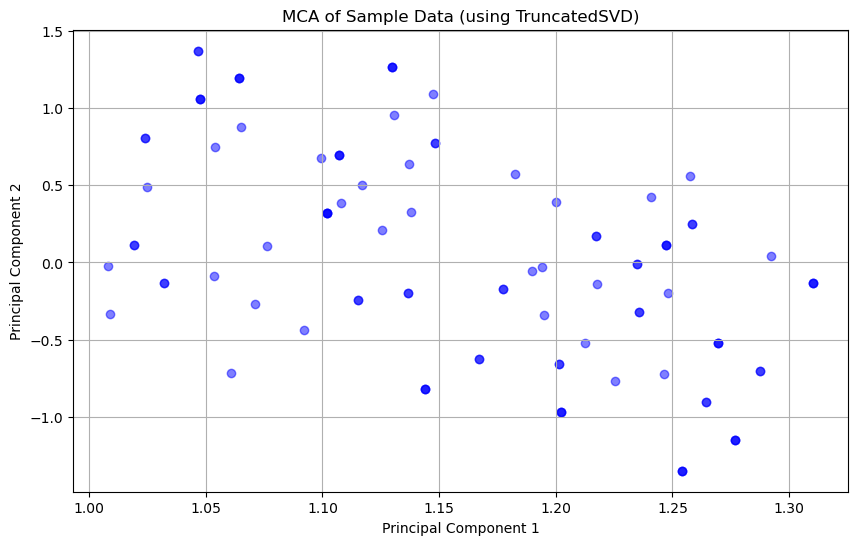

In [33]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df_mca.iloc[:, 0], df_mca.iloc[:, 1], color='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MCA of Sample Data (using TruncatedSVD)')
plt.grid(True)
plt.show()

In [34]:
# Print explained variance ratio
print("\nExplained variance ratio:")
print(svd.explained_variance_ratio_)


Explained variance ratio:
[0.00278708 0.18521801]


In [35]:
# Calculate contributions and cos^2
loadings = svd.components_.T
contributions = (loadings ** 2) / np.sum(loadings ** 2, axis=0)
cos2 = loadings ** 2

In [36]:
print("\nContributions of categories to principal components:")
print(contributions)


Contributions of categories to principal components:
[[0.08157716 0.01081017]
 [0.09508869 0.21532396]
 [0.06893276 0.09177551]
 [0.076473   0.02554582]
 [0.03740465 0.07005222]
 [0.14945326 0.13497612]
 [0.08092719 0.11480785]
 [0.07681045 0.0824643 ]
 [0.08697082 0.0118332 ]
 [0.10257482 0.11511331]
 [0.07169946 0.12552495]
 [0.07208774 0.00177257]]


In [37]:
print("\nCosine squared (cos^2) values:")
print(cos2)


Cosine squared (cos^2) values:
[[0.08157716 0.01081017]
 [0.09508869 0.21532396]
 [0.06893276 0.09177551]
 [0.076473   0.02554582]
 [0.03740465 0.07005222]
 [0.14945326 0.13497612]
 [0.08092719 0.11480785]
 [0.07681045 0.0824643 ]
 [0.08697082 0.0118332 ]
 [0.10257482 0.11511331]
 [0.07169946 0.12552495]
 [0.07208774 0.00177257]]


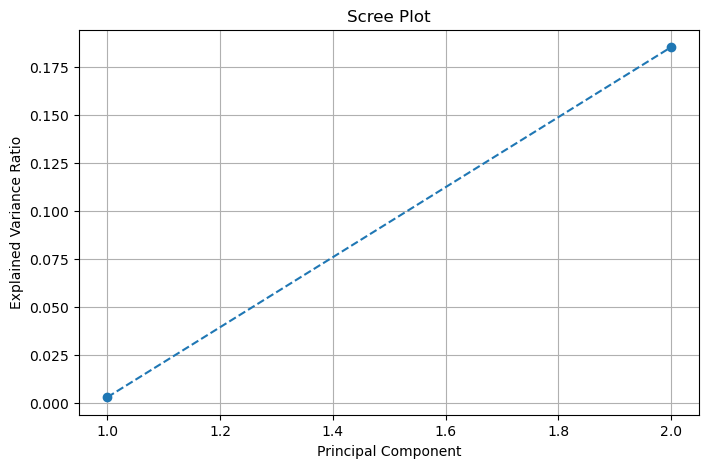

In [38]:
# Plotting Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components+1), svd.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

## Conclusion

MCA is a powerful technique for analyzing and visualizing categorical data. By reducing the dimensionality of the data, MCA helps in uncovering patterns and relationships that may not be immediately apparent. Understanding the mathematical foundations and implementation of MCA can greatly enhance your ability to work with categorical datasets.

Using tools like TruncatedSVD allows us to efficiently perform MCA on large datasets, providing insights into the underlying structure of the data. Whether in marketing, social sciences, or other fields, MCA is a valuable method for exploring and interpreting categorical data.
